In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
evolution = pd.read_csv("Evolution.csv", encoding="UTF-8", delimiter=";")

In [4]:
evolution.head(5)

,Unnamed: 0,Unevolved Pokémon/Basic Pokémon,First-Evolved Pokémon/Stage 1 Pokémon,Second-Evolved/Stage 2
0,1.0,Bulbasaur,Ivysaur,Venusaur
1,2.0,Charmander,Charmeleon,Charizard
2,3.0,Squirtle,Wartortle,Blastoise
3,4.0,Caterpie,Metapod,Butterfree
4,5.0,Weedle,Kakuna,Beedrill


In [5]:
evolution = evolution[["Unevolved Pokémon/Basic Pokémon", "First-Evolved Pokémon/Stage 1 Pokémon", "Second-Evolved/Stage 2"]]

In [6]:
# Umbenennen der Spalten für bessere Handhabbarkeit in evolution_stages
evolution.columns = ['Basic', 'Stage1', 'Stage2']

In [7]:
# Import clean Dataset as dataframe
path = "data\\preprocessed_pokemon_with_Evolution.csv"
df = pd.read_csv(path, encoding= "UTF-8")
df.head()

,Unnamed: 0,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Evolution
0,0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,1.0
1,1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,2.0
2,2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,3.0
3,3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,5.0
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,1.0


In [8]:
# Funktion zur Ermittlung der Evolutionsstufe
def find_stage(name):
    for column in evolution.columns[:]:  # Startet bei 1, um den 'index' zu überspringen
        if name in evolution[column].values:
            return column
    return 'Not Found'

# Anwenden der Funktion auf die Spalte 'Name' im DataFrame pokemon_stats
df['evolution_2'] = df['Name'].apply(find_stage)

In [9]:
df.head(30)

,Unnamed: 0,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Evolution,evolution_2
0,0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,1.0,Basic
1,1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,2.0,Stage1
2,2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,3.0,Stage2
3,3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,5.0,Not Found
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,1.0,Basic
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False,2.0,Stage1
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False,3.0,Stage2
7,7,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False,5.0,Not Found
8,8,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False,5.0,Not Found
9,9,Squirtle,Water,NaN,44,48,65,50,64,43,1,False,1.0,Basic


In [10]:
df.loc[(df['Name'].str.contains('Mega')) & (df['evolution_2'] == 'Not Found'), 'evolution_2'] = 'Mega'

In [11]:
df.loc[df["evolution_2"] == "Not Found"]

,Unnamed: 0,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Evolution,evolution_2
270,270,Ho-oh,Fire,Flying,106,130,90,110,154,90,2,True,0.0,Not Found
422,422,KyogrePrimal Kyogre,Water,NaN,100,150,90,180,160,90,3,True,NaN,Not Found
424,424,Primal Groudon,Ground,Fire,100,180,160,150,90,90,3,True,5.0,Not Found
428,428,Deoxys (Normal Forme),Psychic,NaN,50,150,50,150,50,150,3,True,0.0,Not Found
429,429,Deoxys (Attack Forme),Psychic,NaN,50,180,20,180,20,150,3,True,0.0,Not Found
430,430,Deoxys (Defense Forme),Psychic,NaN,50,70,160,70,160,90,3,True,0.0,Not Found
431,431,Deoxys (Speed Forme),Psychic,NaN,50,95,90,95,90,180,3,True,0.0,Not Found
458,458,Wormadam (Plant Cloak),Bug,Grass,60,59,85,79,105,36,4,False,2.0,Not Found
459,459,Wormadam (Sandy Cloak),Bug,Ground,60,79,105,59,85,36,4,False,2.0,Not Found
460,460,Wormadam (Trash Cloak),Bug,Steel,60,69,95,69,95,36,4,False,2.0,Not Found


In [12]:
df.loc[df["Legendary"]==True]

,Unnamed: 0,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Evolution,evolution_2
156,156,Articuno,Ice,Flying,90,85,100,95,125,85,1,True,0.0,Basic
157,157,Zapdos,Electric,Flying,90,90,85,125,90,100,1,True,0.0,Basic
158,158,Moltres,Fire,Flying,90,100,90,125,85,90,1,True,0.0,Basic
162,162,Mewtwo,Psychic,NaN,106,110,90,154,90,130,1,True,0.0,Basic
163,163,Mega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,True,5.0,Mega
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,795,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,0.0,Basic
796,796,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,5.0,Mega
797,797,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,0.0,Not Found
798,798,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,0.0,Not Found


In [13]:
df.loc[(df['Legendary']==True) & (df['evolution_2'] == 'Not Found'), 'evolution_2'] = 'Basic'

In [14]:
df.loc[df["evolution_2"] == "Not Found"]

,Unnamed: 0,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Evolution,evolution_2
458,458,Wormadam (Plant Cloak),Bug,Grass,60,59,85,79,105,36,4,False,2.0,Not Found
459,459,Wormadam (Sandy Cloak),Bug,Ground,60,79,105,59,85,36,4,False,2.0,Not Found
460,460,Wormadam (Trash Cloak),Bug,Steel,60,69,95,69,95,36,4,False,2.0,Not Found
532,532,Rotom Heat,Electric,Fire,50,65,107,105,107,86,4,False,0.0,Not Found
533,533,Rotom Wash,Electric,Water,50,65,107,105,107,86,4,False,0.0,Not Found
534,534,Rotom Frost,Electric,Ice,50,65,107,105,107,86,4,False,0.0,Not Found
535,535,Rotom Fan,Electric,Flying,50,65,107,105,107,86,4,False,0.0,Not Found
536,536,Rotom Mow,Electric,Grass,50,65,107,105,107,86,4,False,0.0,Not Found
615,615,Darmanitan (Standard Mode),Fire,NaN,105,140,55,30,55,95,5,False,2.0,Not Found
616,616,Darmanitan (Zen Mode),Fire,Psychic,105,30,105,140,105,55,5,False,2.0,Not Found


In [15]:
df.to_csv("pokemon_with_evolution.csv", index=False, encoding="UTF-8" )

In [16]:
df = pd.read_csv("pokemon_with_evolution_edited.csv", encoding="UTF-8", delimiter=";")
df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Evolution,evolution_2
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,1.0,Basic
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,2.0,Stage1
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,3.0,Stage2
3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,5.0,Mega
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,1.0,Basic


In [17]:
df['check'] = (
    (df['Evolution'] == 1.0) & (df['evolution_2'] == 'Basic') |
    (df['Evolution'] == 2.0) & (df['evolution_2'] == 'Stage1') |
    (df['Evolution'] == 3.0) & (df['evolution_2'] == 'Stage2') |
    (df['Evolution'] == 5.0) & (df['evolution_2'] == 'Mega')
)

In [18]:
df.loc[df["check"] == False]

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Evolution,evolution_2,check
30,Pikachu,Electric,NaN,35,55,40,50,50,90,1,False,1.0,Stage1,False
31,Raichu,Electric,NaN,60,90,55,90,80,110,1,False,2.0,Stage2,False
34,Nidoran?,Poison,NaN,55,47,52,40,40,41,1,False,0.0,Basic,False
35,Nidorina,Poison,NaN,70,62,67,55,55,56,1,False,1.0,Stage1,False
36,Nidoqueen,Poison,Ground,90,92,87,75,85,76,1,False,2.0,Stage2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,Zygarde (50% Forme),Dragon,Ground,108,100,121,81,95,95,6,True,0.0,Basic,False
795,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,0.0,Basic,False
797,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,0.0,Basic,False
798,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,0.0,Basic,False


In [19]:
df = df.drop(columns=['Evolution','check'])


In [20]:
df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,evolution_2
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,Basic
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,Stage1
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,Stage2
3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,Mega
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,Basic


In [21]:
df.rename(columns={'evolution_2': 'Evolution'}, inplace=True)

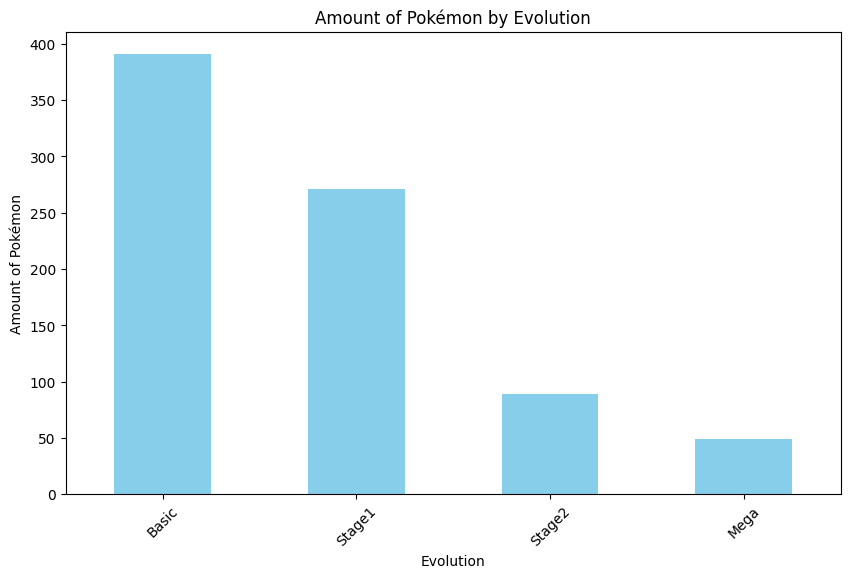

In [27]:

# aggregate
evolution_counts = df['Evolution'].value_counts()

# create diagram
plt.figure(figsize=(10, 6))  
evolution_counts.plot(kind='bar', color='skyblue')  
plt.title('Amount of Pokémon by Evolution')
plt.xlabel('Evolution')  
plt.ylabel('Amount of Pokémon') 
plt.xticks(rotation=45) 
plt.show()

In [22]:
df.to_csv("pokemon_train_set.csv", encoding="UTF-8", index=False)